## Plot discrete land cover classes

This notebook will demonstrate how to plot a land cover dataset with discrete, labeled classes. For this example we are using Impact Observatory's [Land Cover 9-class](https://docs.cecil.earth/Land-Cover-9-Class-111ef16bbbe481c0bb41e6e79ec441c8) dataset, but this same method can be used for any dataset with discrete categories. 

First we set up the Cecil client, load the dataset of interest, and filter out NoData. 

In [1]:
import cecil
import xarray
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

client = cecil.Client()

ds = client.load_xarray('1dd55fdb-fbab-4943-a984-4d327baf4356')
valid_ds = ds.where(ds['land_cover_class'] != ds['land_cover_class']._FillValue)

To generate the labeled plot, we next subset to the land cover data for just one year and plot land cover classes with a discrete, labeled colormap.

For this Impact Observatory dataset, the class values, names, and descriptions are all provided in the [dataset documentation](https://docs.cecil.earth/Land-Cover-9-Class-111ef16bbbe481c0bb41e6e79ec441c8). 

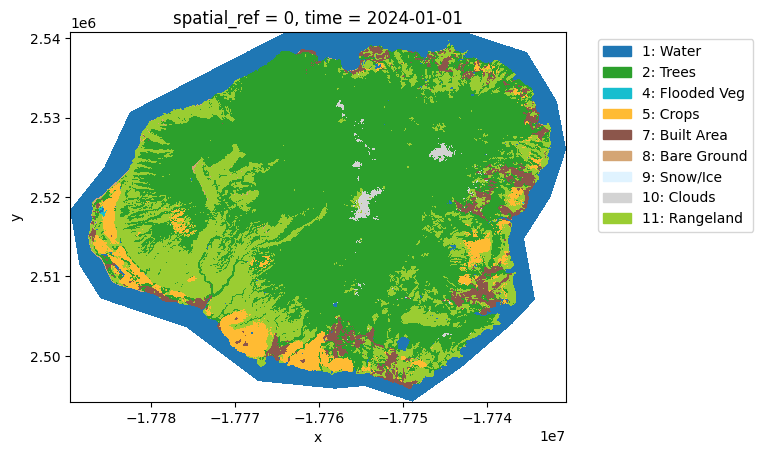

In [2]:
# Select the land cover data for just one year.
land_cover_2024 = valid_ds['land_cover_class'].sel(time='2024')

# Provide a list of color hex codes, land cover class values and names for each land cover class.
land_cover_colors = ["#1f77b4", "#2ca02c", "#17becf", "#ffbb33", "#8c564b", "#d4a574", "#e0f3ff", "#d3d3d3", "#9acd32"]
land_cover_vals = [1, 2, 4, 5, 7, 8, 9, 10, 11]
land_cover_names = ["Water", "Trees", "Flooded Veg", "Crops", "Built Area", "Bare Ground", "Snow/Ice", "Clouds", "Rangeland"]


# Get list of class bounds (e.g. 0.5, 1.5, 3.5, etc.) and plot the data with the specified levels.
levels = [x - 0.5 for x in land_cover_vals] + [land_cover_vals[-1] + 0.5]
land_cover_2024.plot(
    levels=levels, 
    colors=land_cover_colors, 
    add_colorbar=False # Disable default colorbar because we are creating our own. 
    )

# Create custom legend linking class values to colors and names.
legend_patches = [mpatches.Patch(color=color, label=f"{val}: {name}") 
                  for val, color, name in zip(land_cover_vals, land_cover_colors, land_cover_names)]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()